# Redshift Data of DESIJ1554+0443

Author: Anowar Shajib, S M Rafee Adnan

In [1]:
!pip install astropy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.7/738.7 kB 32.6 MB/s eta 0:00:00


## Load data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from astropy.io import fits
from astropy.wcs import WCS

In [3]:
data, header = fits.getdata(
    "/kaggle/input/fits-file/DESIJ15540443_F140W_drz_sci.fits", header=True
)

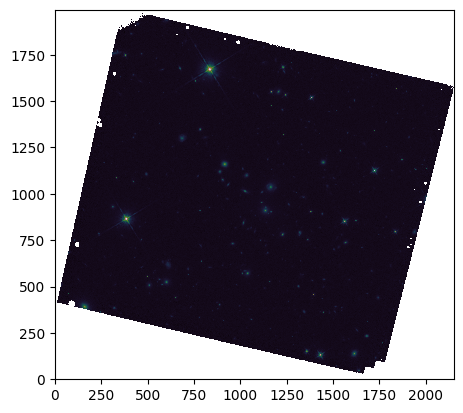

In [4]:
plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

In [ ]:
# need to be changed for each cluster file
FILENAME = "/kaggle/input/phot-z/photo_z_DESIJ15540443.csv"
data_legacy = pd.read_csv(FILENAME, delimiter=",")
data_legacy.head()

,_r,id,RAJ2000,DEJ2000,release,brickid,objid,type,pstar,gmmcomp,zphot,e_zphot,fclean,fqual
0,0.007949,8000358665002828,238.569453,4.719671,8000,358665,2828,REX,0.057,R0,0.746,0.246,1,1
1,0.007014,8000358665002829,238.569710,4.720576,8000,358665,2829,REX,0.005,R0,0.723,0.405,1,0
2,0.006456,8000358665002849,238.567650,4.721877,8000,358665,2849,REX,0.000,R4,0.751,0.063,1,1
3,0.007550,8000358665002850,238.565573,4.722067,8000,358665,2850,REX,0.008,R4,0.716,0.060,1,1
4,0.006307,8000358665002853,238.566021,4.723405,8000,358665,2853,REX,0.004,R0,0.835,0.491,1,0


In [6]:
%matplotlib widget
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

Canvas(toolbar=None)

In [7]:
# In degrees
center_x, center_y = 238.5688333, 4.7275000  # RA 15:54:17 DEC 04:43:39
radii = 40  # in arcsec
radii_deg = radii / 3600

x_upper, y_upper = center_x + radii_deg, center_y + radii_deg
x_lower, y_lower = center_x - radii_deg, center_y - radii_deg

x_limit_upper, y_limit_upper = wcs.all_world2pix(x_upper, y_upper, 0)
x_limit_lower, y_limit_lower = wcs.all_world2pix(x_lower, y_lower, 0)

print(x_limit_upper, x_limit_lower)

676.4541873626722 1673.0553605597397


In [8]:
data_legacy_cropped = data_legacy[
    (data_legacy["RAJ2000"] < x_upper)
    & (data_legacy["RAJ2000"] > x_lower)
    & (data_legacy["DEJ2000"] < y_upper)
    & (data_legacy["DEJ2000"] > y_lower)
]

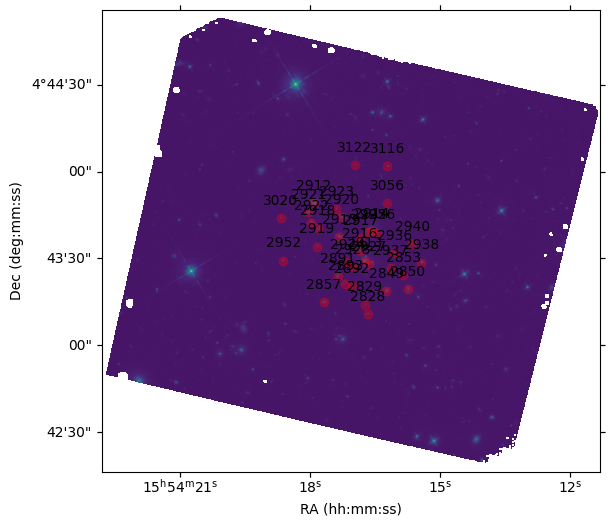

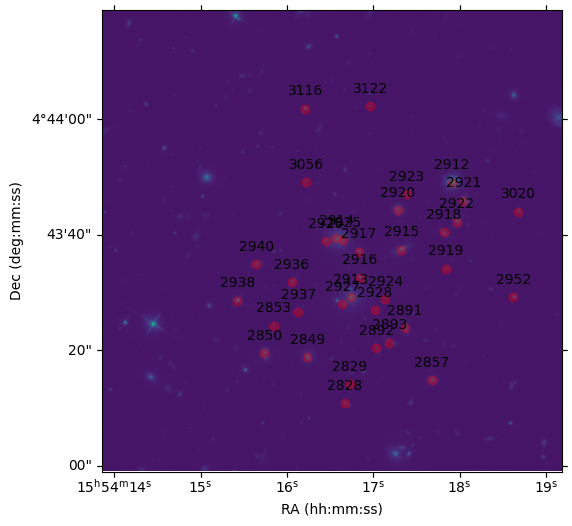

In [9]:
%matplotlib inline

wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

In [10]:
data_legacy.sort_values(by="objid")

# central deflector
central_deflector_id = 2914
object_ids = [central_deflector_id, 2926, 2925, 2917, 2916]

columns_to_drop = [
    "id",
    "release",
    "brickid",
    "fclean",
    "fqual",
]  # List of column names to drop
data_legacy_dropped = data_legacy.drop(columns=columns_to_drop)

selected_data_legacy = data_legacy_dropped[
    data_legacy_dropped["objid"].isin(object_ids)
]
selected_data_legacy.set_index("objid", inplace=True)

print(selected_data_legacy)

             _r     RAJ2000   DEJ2000 type  pstar gmmcomp  zphot  e_zphot
objid                                                                    
2914   0.001796  238.569036  4.727623  DEV  0.250      D8  0.591    0.058
2916   0.001895  238.570195  4.725715  PSF  0.003      P3  0.478    0.289
2917   0.000876  238.570140  4.726963  REX  0.009      R6  0.722    0.164
2925   0.001451  238.569377  4.727523  EXP  0.000      E6  0.894    0.137
2926   0.002298  238.568527  4.727454  EXP  0.001      E5  1.064    0.299


In [11]:
zphot_deflector = selected_data_legacy.loc[central_deflector_id, "zphot"]
del_z = 0.03 * (1 + zphot_deflector)
print("zphot_deflector:", zphot_deflector)
print("del_z:", del_z)
data_legacy_cropped_dropped = data_legacy_cropped.drop(columns=columns_to_drop)
data_legacy_cropped_dropped.set_index("objid", inplace=True)
# selected_data_legacy.set_index("objid", inplace=True)

not_neighbour_data_legacy = data_legacy_cropped_dropped[
    (data_legacy_cropped_dropped["zphot"] <= zphot_deflector - del_z)
    | (data_legacy_cropped_dropped["zphot"] >= zphot_deflector + del_z)
]

print(not_neighbour_data_legacy)

zphot_deflector: 0.591
del_z: 0.047729999999999995
             _r     RAJ2000   DEJ2000 type  pstar gmmcomp  zphot  e_zphot
objid                                                                    
2828   0.007949  238.569453  4.719671  REX  0.057      R0  0.746    0.246
2829   0.007014  238.569710  4.720576  REX  0.005      R0  0.723    0.405
2849   0.006456  238.567650  4.721877  REX  0.000      R4  0.751    0.063
2850   0.007550  238.565573  4.722067  REX  0.008      R4  0.716    0.060
2853   0.006307  238.566021  4.723405  REX  0.004      R0  0.835    0.491
2857   0.007273  238.573656  4.720793  REX  0.003      R4  0.842    0.077
2891   0.004482  238.572348  4.723280  REX  0.006      R6  0.942    0.083
2892   0.005169  238.570979  4.722333  PSF  0.001      P9  0.954    0.293
2893   0.004976  238.571605  4.722584  REX  0.004      R8  0.988    0.130
2912   0.004689  238.574618  4.730286  REX  0.005      R3  0.148    0.067
2913   0.002939  238.569743  4.724769  DEV  0.001      D9  0.

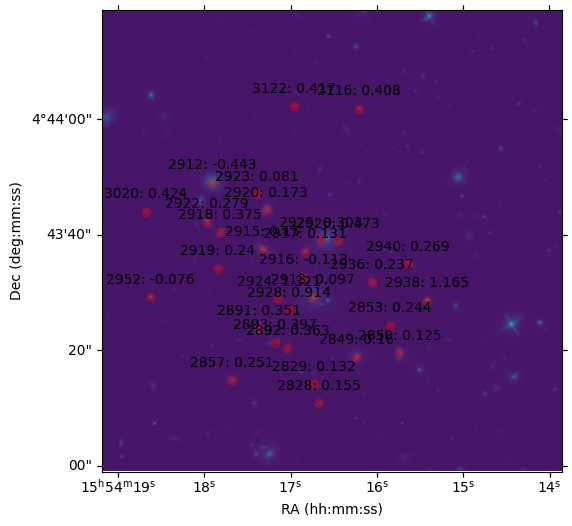

In [12]:
%matplotlib inline
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    not_neighbour_data_legacy["RAJ2000"], not_neighbour_data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = not_neighbour_data_legacy.index[
        i
    ]  # Accessing the 'objid' column from your DataFrame
    zphot = not_neighbour_data_legacy.iloc[i]["zphot"]
    plt.annotate(
        f"{obj_id}: {round(zphot - zphot_deflector, 3)}",
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha="center",
    )

ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)

ax.invert_xaxis()
# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

## Save the Redshift data to the YAML file

In [13]:
# Existing YAML file with other parameters
existing_yaml_file = "/kaggle/input/point-estimates/DESIJ15540443_point_estimates.yml"

# Variables to include in the YAML file
z_phot = selected_data_legacy.loc[central_deflector_id, "zphot"]
e_zphot = selected_data_legacy.loc[central_deflector_id, "e_zphot"]

environment_variables = {"z_phot": [z_phot, e_zphot]}

# make all the numpy variales to float
environment_variables = {
    key: [float(item) for item in value] if isinstance(value, list) else float(value)
    for key, value in environment_variables.items()
}

# Load existing YAML content if the file exists
existing_content = {}
try:
    with open(existing_yaml_file, "r") as file:
        existing_content = yaml.safe_load(file)
except FileNotFoundError:
    pass

# Update the existing content with new variables
existing_content.update(environment_variables)

# Write the updated content back to the YAML file
# with open(existing_yaml_file, "w") as file:
#     yaml.dump(existing_content, file, default_flow_style=False)